In [1]:
import cv2
import matplotlib.pyplot as plt
#loading bgr and gray image
bgr_img = cv2.imread('images/green.png')
gray_img = cv2.imread('images/green.png',cv2.IMREAD_GRAYSCALE)

In [2]:
cv2.imshow('title',bgr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

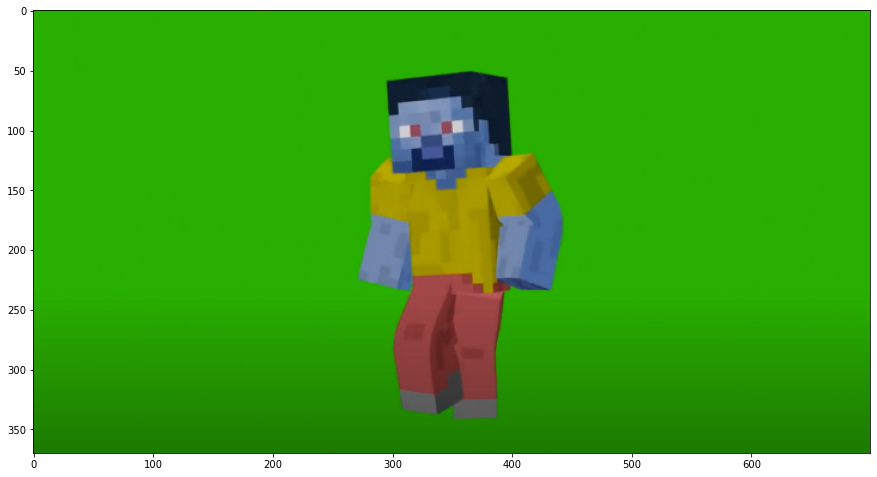

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(bgr_img)

Text(0.5, 1.0, 'inverse binary thresholding')

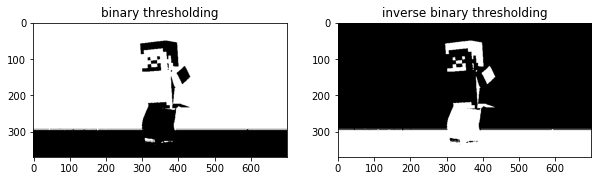

In [12]:
#global thresholding binary
#regulary binary
_,tresh_bin = cv2.threshold(gray_img,92,255,type=cv2.THRESH_BINARY)
#binary inverse
_,tresh_bin_inv= cv2.threshold(gray_img,92,255,type=cv2.THRESH_BINARY_INV)
fig,ax = plt.subplots(1,2,figsize=(10,12))
ax[0].imshow(tresh_bin,cmap='gray')
ax[0].set_title('binary thresholding')
ax[1].imshow(tresh_bin_inv,cmap='gray')
ax[1].set_title('inverse binary thresholding')

Text(0.5, 1.0, 'Trunc thresholding')

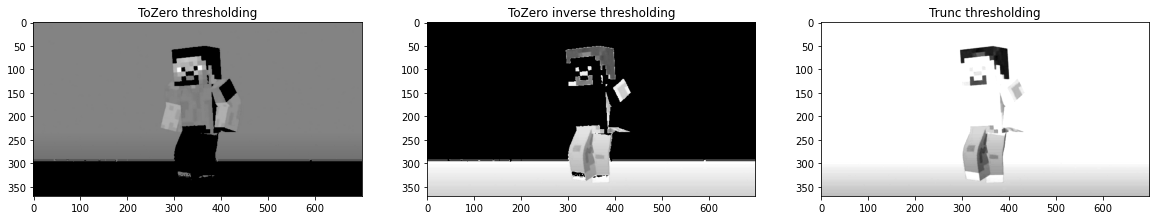

In [13]:
#global thresholding 
_,tresh_to_zero = cv2.threshold(gray_img,92,255,type=cv2.THRESH_TOZERO)
_,tresh_to_zero_inv = cv2.threshold(gray_img,92,255,type=cv2.THRESH_TOZERO_INV)
_,tresh_trunc = cv2.threshold(gray_img,92,255,type=cv2.THRESH_TRUNC)
fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(tresh_to_zero,cmap='gray')
ax[0].set_title('ToZero thresholding')
ax[1].imshow(tresh_to_zero_inv,cmap='gray')
ax[1].set_title('ToZero inverse thresholding')
ax[2].imshow(tresh_trunc,cmap='gray')
ax[2].set_title('Trunc thresholding')

Text(0.5, 1.0, 'adaptive thresholding - mean ')

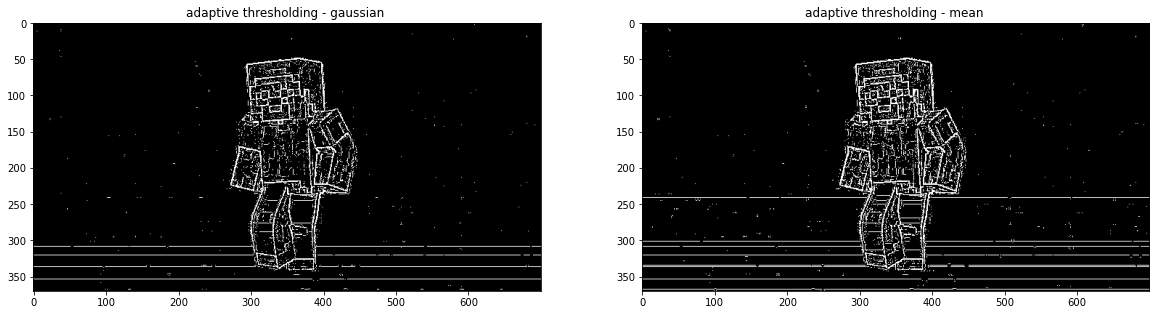

In [14]:
#adaptive thresholding
tresh_adapt_gauss = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,0)
tresh_adapt_mean = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,0)
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(tresh_adapt_gauss,cmap='gray')
ax[0].set_title('adaptive thresholding - gaussian ')
ax[1].imshow(tresh_adapt_mean,cmap='gray')
ax[1].set_title('adaptive thresholding - mean ')



Text(0.5, 1.0, 'otsu thresholding - w/ blur')

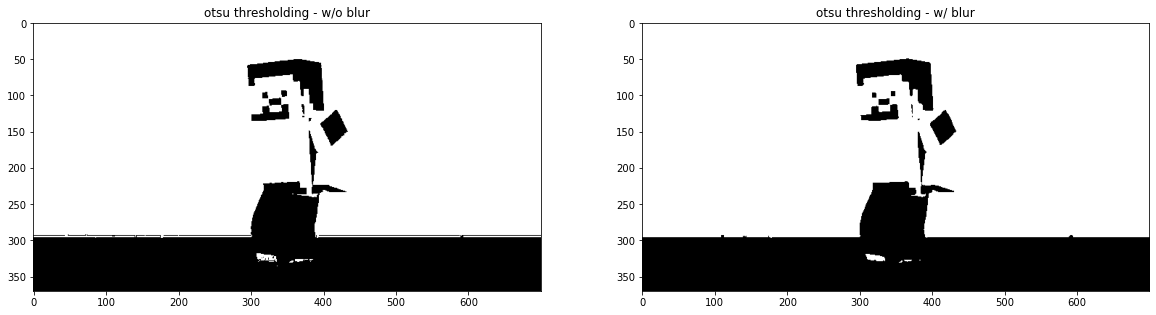

In [15]:
blur = cv2.GaussianBlur(gray_img,(3,3),5)
_,tresh_otsu = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_,tresh_otsu_blur = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(tresh_otsu,cmap='gray')
ax[0].set_title('otsu thresholding - w/o blur')
ax[1].imshow(tresh_otsu_blur,cmap='gray')
ax[1].set_title('otsu thresholding - w/ blur')

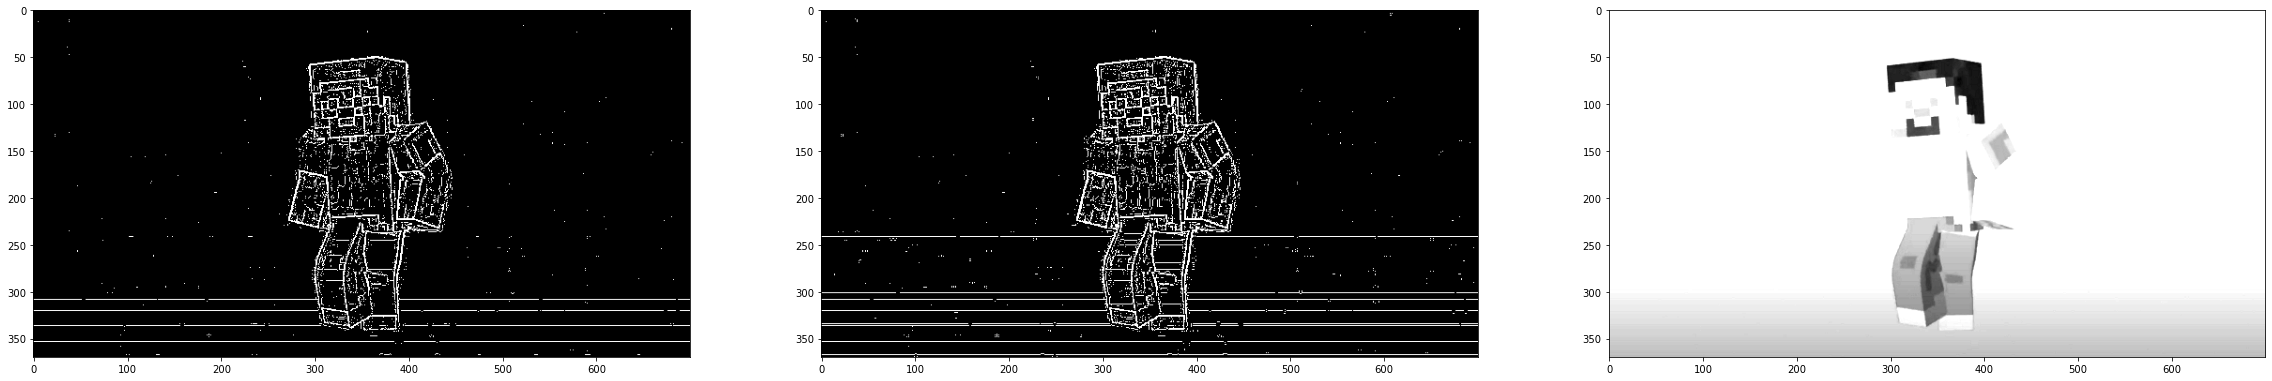

In [21]:
tresh_adapt_gauss = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,0)
tresh_adapt_mean = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,0)
fig,ax = plt.subplots(1,3,figsize=(40,30))
ax[0].imshow(tresh_adapt_gauss,cmap='gray')
ax[1].imshow(tresh_adapt_mean,cmap='gray')
ax[2].imshow(tresh_trunc,cmap='gray')



Text(0.5, 1.0, 'input after - first erosion,then dilation applied')

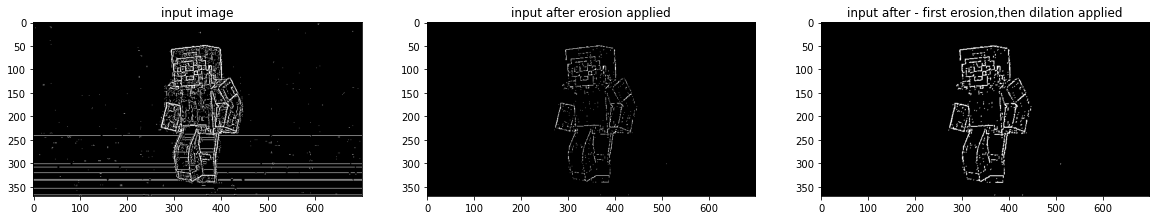

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
eroded = cv2.erode(tresh_adapt_mean,kernel)
fig,ax = plt.subplots(1,3,figsize=(20,20))
dilated = cv2.dilate(eroded,kernel)
ax[0].imshow(tresh_adapt_mean,cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(eroded,cmap='gray')
ax[1].set_title('input after erosion applied')
ax[2].imshow(dilated,cmap='gray')
ax[2].set_title('input after - first erosion,then dilation applied')

Text(0.5, 1.0, 'closing  -> dilation followed by erosion ')

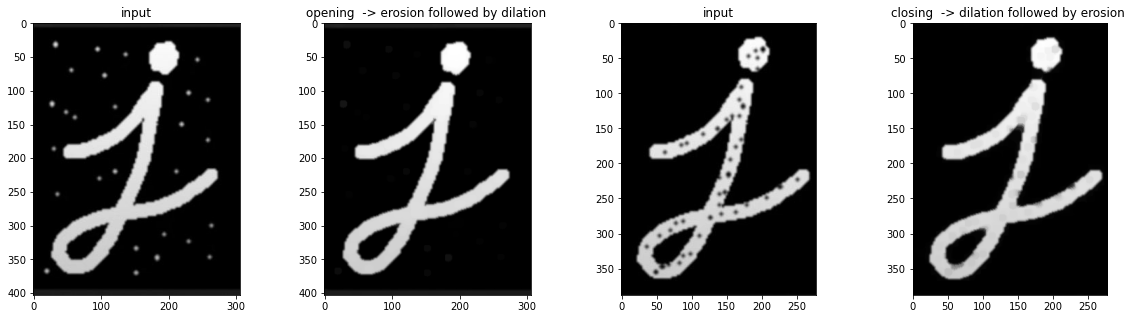

In [63]:
img_opening = cv2.imread('images/opening.jpg',cv2.IMREAD_GRAYSCALE)
fig,ax = plt.subplots(1,4,figsize=(20,5))

ax[0].imshow(img_opening,cmap='gray')
ax[0].set_title('input')
kernell= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
opened = cv2.morphologyEx(img_opening,cv2.MORPH_OPEN,kernell)
ax[1].imshow(opened,cmap='gray')
ax[1].set_title('opening  -> erosion followed by dilation ')
img_closing = cv2.imread('images/closing.jpg',cv2.IMREAD_GRAYSCALE)
ax[2].imshow(img_closing,cmap='gray')
ax[2].set_title('input')
closed = opened = cv2.morphologyEx(img_closing,cv2.MORPH_CLOSE,kernell)
ax[3].imshow(closed,cmap='gray')
ax[3].set_title('closing  -> dilation followed by erosion ')

